In [1]:
import numpy as np
import pandas as pd
import csv
import wget
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.preprocessing import StandardScaler # standard transformation
from sklearn.preprocessing import MinMaxScaler # Min - Max transformation
from sklearn.model_selection import train_test_split # split
from sklearn.metrics import confusion_matrix # evaluate
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix # plot confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import jaccard_score
from sklearn.datasets._samples_generator import make_blobs
import pickle

# **LINEAR MODEL**

`Single Linear Regression`

`Non-Linear Regression`

Non-linear regressions are a relationship between independent variables $x$ and a dependent variable $y$ which result in a non-linear function modeled data. Essentially any relationship that is not linear can be termed as non-linear, and is usually represented by the polynomial of $k$ degrees (maximum power of $x$). 

$$ \ y = a x^3 + b x^2 + c x + d \ $$

Non-linear functions can have elements like exponentials, logarithms, fractions, and others. For example: $$ y = \log(x)$$

Or even, more complicated such as :
$$ y = \log(a x^3 + b x^2 + c x + d)$$

`Polynomial Regression`

Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

In essence, we can call all of these, polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):

$$y = b + \theta_1  x + \theta_2 x^2$$

Now, the question is: how we can fit our data on this equation while we have only x values, such as **Engine Size**? 
Well, we can create a few additional features: 1, $x$, and $x^2$.

**PolynomialFeatures()** function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, _ENGINESIZE_. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2: 


`Multiple Linear Regression`



In [2]:
from sklearn.preprocessing import PolynomialFeatures # Transform Poly features
from sklearn.linear_model import LinearRegression

#### Evaluation

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 

```
- Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to
 understand since it’s just average error.
- Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular 
than Mean absolute error because the focus is geared more towards large errors. This is due to the squared 
term exponentially increasing larger errors in comparison to smaller ones.
- Root Mean Squared Error (RMSE).
- R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data
 are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best 
 possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
```

**explained variance regression score:**  
If $\hat{y}$ is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var{ y - \hat{y}}}{Var{y}}$  
The best possible score is 1.0, lower values are worse.


# Stimulate a model polynomial

$$ \ y = a x^3 + b x^2 + c x + d \ $$
$$ degree = 3 $$

In [3]:
# set a = 2, b = 3, c = -5, d = -10
a,b,c,d = 2,3,-5,1
x = np.arange(-10,10,0.1)
x_noise = 300 * np.random.normal(size=x.size)

y = a * x**3 + b * x**2 + c * x + d + x_noise
y_true = a * x**3 + b * x**2 + c * x + d


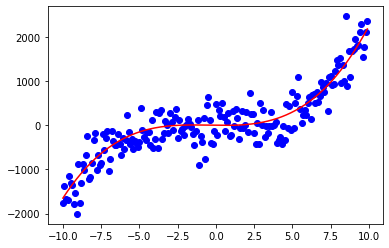

In [4]:
plt.scatter(x = x,y = y,c = 'b')
plt.plot(x, y_true, 'r')
plt.show()

In [5]:
# tranform

with open("FuelConsumptionCo2.csv") as f:
    df = np.array([line.split(sep = ",") for i,line in enumerate(f.readlines())])

x = df.transpose()[[4]]
y = df.transpose()[[12]]

In [6]:
x = np.array([list(i[1:]) for i in x]).astype("float").transpose()

In [7]:
y = y[0][1:].astype("float").transpose().reshape(-1,1)

In [8]:
poly = PolynomialFeatures(degree=2) # a * x2 + b * x + c

In [9]:
x_tranform = poly.fit_transform(x)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_tranform, y , test_size = 0.2, random_state = 0,)

In [11]:
lm = LinearRegression().fit(x_train,y_train)

y_predicted = lm.predict(x_test)

# 0 , a , b , c
lm.coef_ , lm.intercept_

(array([[ 0.        , 49.44724505, -1.34988027]]), array([109.857053]))

In [12]:
print("r2square: %.2f" % r2_score(y_test, y_predicted))

r2square: 0.72


In [13]:
print("Variance score: %.2f" % lm.score(x_train,y_train))

Variance score: 0.78


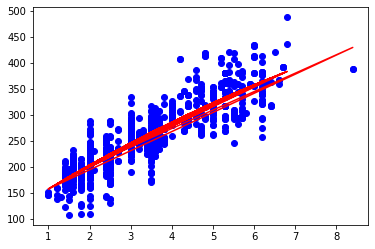

In [14]:
plt.scatter(x,y,c='b')
plt.plot(x,lm.intercept_ + lm.coef_[0][1] * x + lm.coef_[0][2] * x**2, 'r')
plt.show()

# **CLASSIFICATION**

`Decision Trees`

`K Nearest Neighbors (KNN)`

`Logistic Regression` (Next cell)

`Support vector machine`

The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

```
1.Linear
2.Polynomial
3.Radial basis function (RBF)
4.Sigmoid
```

Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset, we usually choose different functions in turn and compare the results. Let's just use the default, RBF (Radial Basis Function) for this lab.


<a id="ref1"></a>

## What is the difference between Linear and Logistic Regression?

While Linear Regression is suited for estimating continuous values (e.g. estimating house price), it is not the best tool for predicting the class of an observed data point. In order to estimate the class of a data point, we need some sort of guidance on what would be the <b>most probable class</b> for that data point. For this, we use <b>Logistic Regression</b>.

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Recall linear regression:</strong></font>
<br>
<br>
    As you know, <b>Linear regression</b> finds a function that relates a continuous dependent variable, <b>y</b>, to some predictors (independent variables $x_1$,$x_2$, etc.). For example, Simple linear regression assumes a function of the form:
<br><br>

$$
y = \theta_0 + \theta_1  x_1 + \theta_2  x_2 + \cdots
$$

<br>
and finds the values of parameters $$\theta_0, \theta_1, \theta_2$$, etc, where the term $\theta_0$ is the "intercept". It can be generally shown as:
<br><br>

$$
ℎ_\theta(𝑥) = \theta^TX
$$

<p></p>

</div>

Logistic Regression is a variation of Linear Regression, useful when the observed dependent variable, <b>y</b>, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

Logistic regression fits a special s-shaped curve by taking the linear regression and transforming the numeric estimate into a probability with the following function, which is called sigmoid function 𝜎:

$$
ℎ_\theta(𝑥) = \sigma({\theta^TX}) =  \frac {e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +...)}}{1 + e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +\cdots)}}
$$
Or:
$$
ProbabilityOfaClass_1 =  P(Y=1|X) = \sigma({\theta^TX}) = \frac{e^{\theta^TX}}{1+e^{\theta^TX}} 
$$

In this equation, ${\theta^TX}$ is the regression result (the sum of the variables weighted by the coefficients), `exp` is the exponential function and $\sigma(\theta^TX)$ is the sigmoid or [logistic function](http://en.wikipedia.org/wiki/Logistic_function?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ), also called logistic curve. It is a common "S" shape (sigmoid curve).

So, briefly, Logistic Regression passes the input through the logistic/sigmoid but then treats the result as a probability:

<img
src="https://ibm.box.com/shared/static/kgv9alcghmjcv97op4d6onkyxevk23b1.png" width="400" align="center">

The objective of **Logistic Regression** algorithm, is to find the best parameters θ, for $ℎ_\theta(𝑥)$ = $\sigma({\theta^TX})$, in such a way that the model best predicts the class of each case.


In [15]:
y_svm_test, clf.predict(x_svm_test)))

plot_confusion_matrix(clf, x_svm_test.to_numpy().reshape(-1,2), y_svm_test.to_numpy().reshape(-1,1))

plt.show()

SyntaxError: invalid syntax (<ipython-input-15-6915dbb6ddfc>, line 1)

In [162]:
from sklearn.tree import DecisionTreeClassifier # Decision tree
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.linear_model import LogisticRegression # LogisticRegression
from sklearn.svm import SVC # SVM


In [90]:
df_svm = pd.read_csv(".\IBM ML\cell_samples.csv")

df_svm.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [75]:
df_svm.shape

(699, 11)

In [76]:
df_svm.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [109]:
df_svm["BareNuc"] = pd.to_numeric(df_svm["BareNuc"],errors='coerce')
df_svm["BareNuc"] = df_svm["BareNuc"].astype("int")
df_svm.dropna(inplace = True)

In [111]:
df_svm.shape

(683, 11)

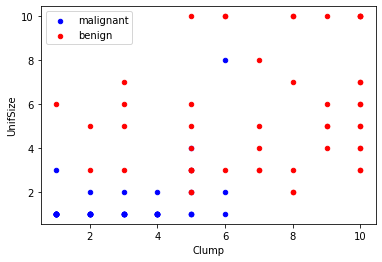

In [120]:
ax = df_svm[df_svm["Class"] == 2][0:50].plot(kind = "scatter", x = "Clump", y = "UnifSize", label = "malignant", c='b')
df_svm[df_svm["Class"] == 4][0:50].plot(kind = "scatter", x = "Clump", y = "UnifSize", label = "benign", c='r', ax = ax)

plt.show()

In [124]:
x_svm = df_svm[["Clump","UnifSize"]]
y_svm = df_svm["Class"]

In [125]:
x_svm_train, x_svm_test, y_svm_train, y_svm_test = train_test_split(x_svm,y_svm)

In [127]:
clf = SVC(C = 0.01, kernel= 'rbf', random_state=0).fit(x_svm_train,y_svm_train)

In [135]:
accuracy_score(y_svm_test, clf.predict(x_svm_test))

0.9298245614035088

In [156]:
print (classification_report(y_svm_test, clf.predict(x_svm_test)))

              precision    recall  f1-score   support

           2       0.92      0.98      0.95       115
           4       0.96      0.82      0.88        56

    accuracy                           0.93       171
   macro avg       0.94      0.90      0.92       171
weighted avg       0.93      0.93      0.93       171



Based on the count of each section, we can calculate precision and recall of each label:

-   **Precision** is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

-   **Recall** is true positive rate. It is defined as: Recall =  TP / (TP + FN)

So, we can calculate precision and recall of each class.

**F1 score:**
Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label. 

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.

And finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.72 in our case.


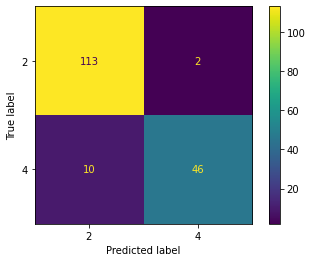

In [155]:
plot_confusion_matrix(clf, x_svm_test.to_numpy().reshape(-1,2), y_svm_test.to_numpy().reshape(-1,1))

plt.show()

# different case -> different numbers

Look at first row. The first row is for customers whose actual churn value in test set is 1.
As you can calculate, out of 40 customers, the churn value of 15 of them is 1. 
And out of these 15, the classifier correctly predicted 6 of them as 1, and 9 of them as 0. 

It means, for 6 customers, the actual churn value were 1 in test set, and classifier also correctly predicted those as 1. However, while the actual label of 9 customers were 1, the classifier predicted those as 0, which is not very good. We can consider it as error of the model for first row.

What about the customers with churn value 0? Lets look at the second row.
It looks like  there were 25 customers whom their churn value were 0. 

The classifier correctly predicted 24 of them as 0, and one of them wrongly as 1. So, it has done a good job in predicting the customers with churn value 0. A good thing about confusion matrix is that shows the model’s ability to correctly predict or separate the classes.  In specific case of binary classifier, such as this example,  we can interpret these numbers as the count of true positives, false positives, true negatives, and false negatives. 


### jaccard index

Lets try jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


# **CLUSTERING**

`K-Means`

There are many models for **clustering** out there. In this notebook, we will be presenting the model that is considered one of the simplest models amongst them. Despite its simplicity, the **K-means** is vastly used for clustering in many data science applications, especially useful if you need to quickly discover insights from **unlabeled data**. In this notebook, you will learn how to use k-Means for customer segmentation.

Some real-world applications of k-means:

-   Customer segmentation
-   Understand what the visitors of a website are trying to accomplish
-   Pattern recognition
-   Machine learning
-   Data compression

In this notebook we practice k-means clustering with 2 examples:

-   k-means on a random generated dataset
-   Using k-means for customer segmentation

`Hierarchical`

We will be looking at a clustering technique, which is <b>Agglomerative Hierarchical Clustering</b>. Remember that agglomerative is the bottom up approach. <br> <br>
In this lab, we will be looking at Agglomerative clustering, which is more popular than Divisive clustering. <br> <br>
We will also be using Complete Linkage as the Linkage Criteria. <br>
<b> <i> NOTE: You can also try using Average Linkage wherever Complete Linkage would be used to see the difference! </i> </b>


`DBSCN`

Most of the traditional clustering techniques, such as k-means, hierarchical and fuzzy clustering, can be used to group data without supervision. 

However, when applied to tasks with arbitrary shape clusters, or clusters within cluster, the traditional techniques might be unable to achieve good results. That is, elements in the same cluster might not share enough similarity or the performance may be poor.
Additionally, Density-based Clustering locates regions of high density that are separated from one another by regions of low density. Density, in this context, is defined as the number of points within a specified radius.

In this section, the main focus will be manipulating the data and properties of DBSCAN and observing the resulting clustering.


In [166]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering # Hierarchical
from sklearn.cluster import DBSCAN

# Hierachical Clusstering

<hr>
<h3 id="generating_data">Generating Random Data</h3>
We will be generating a set of data using the <b>make_blobs</b> class. <br> <br>
Input these parameters into make_blobs:
<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Choose a number from 10-1500 </li> </ul>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Choose arrays of x,y coordinates for generating the centers. Have 1-10 centers (ex. centers=[[1,1], [2,5]]) </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. The larger the number, the further apart the clusters</li>
    <ul> <li> Choose a number between 0.5-1.5 </li> </ul>
</ul> <br>
Save the result to <b>X1</b> and <b>y1</b>.


In [177]:
X1, y1 = make_blobs(n_samples= 300, centers= [[6,6], [9,9], [0,7]], cluster_std= 0.9)

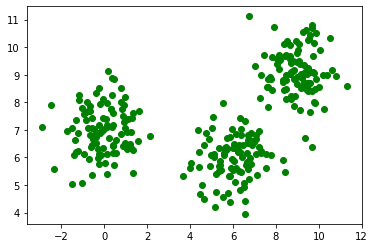

In [184]:
# Plot data

plt.scatter(X1[:,0],X1[:,1], c = 'g')
plt.show()

In [186]:
agglom = AgglomerativeClustering(n_clusters=3, linkage="average").fit(X1,y1)

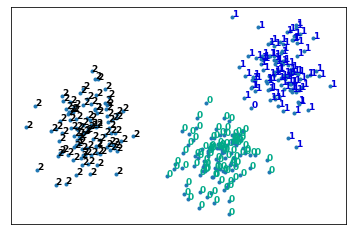

In [190]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i]/5.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')



# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()

In [191]:
# Test on real dataset

wget.download(r"https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module 4/data/cars_clus.csv","cars_clus.csv ")

'cars_clus.csv '

In [192]:
df_hierarchical = pd.read_csv("cars_clus.csv")
df_hierarchical.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [224]:
df_hierarchical[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']] = df_hierarchical[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']].apply(pd.to_numeric, errors = 'coerce')

In [226]:
df_hierarchical.size

2512

In [235]:
print ("Shape of dataset before cleaning: ", df_hierarchical.size)
df_hierarchical[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = df_hierarchical[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
df_hierarchical = df_hierarchical.dropna()
df_hierarchical = df_hierarchical.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", df_hierarchical.size)
df_hierarchical.head(5)

Shape of dataset before cleaning:  1872
Shape of dataset after cleaning:  1872


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


In [236]:
featureset = df_hierarchical[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

In [237]:
x = featureset.values

x_transform = MinMaxScaler().fit_transform(x)

In [238]:
x_transform.shape

(117, 8)

In [239]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(x_transform)
agglom.labels_

array([1, 2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 2, 3, 3, 2, 1, 1, 2, 2, 2, 5, 1,
       4, 1, 1, 2, 1, 2, 1, 1, 1, 5, 0, 0, 0, 3, 2, 1, 2, 1, 2, 3, 2, 3,
       0, 3, 0, 1, 1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 2, 3, 2, 3, 1, 2, 3, 5, 1, 1, 2, 3, 2, 1, 3,
       2, 3, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 0, 1, 1, 1, 1, 1], dtype=int64)

In [241]:
df_hierarchical['cluster_'] = agglom.labels_
df_hierarchical.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,1
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,2
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,2
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,1
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,2


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

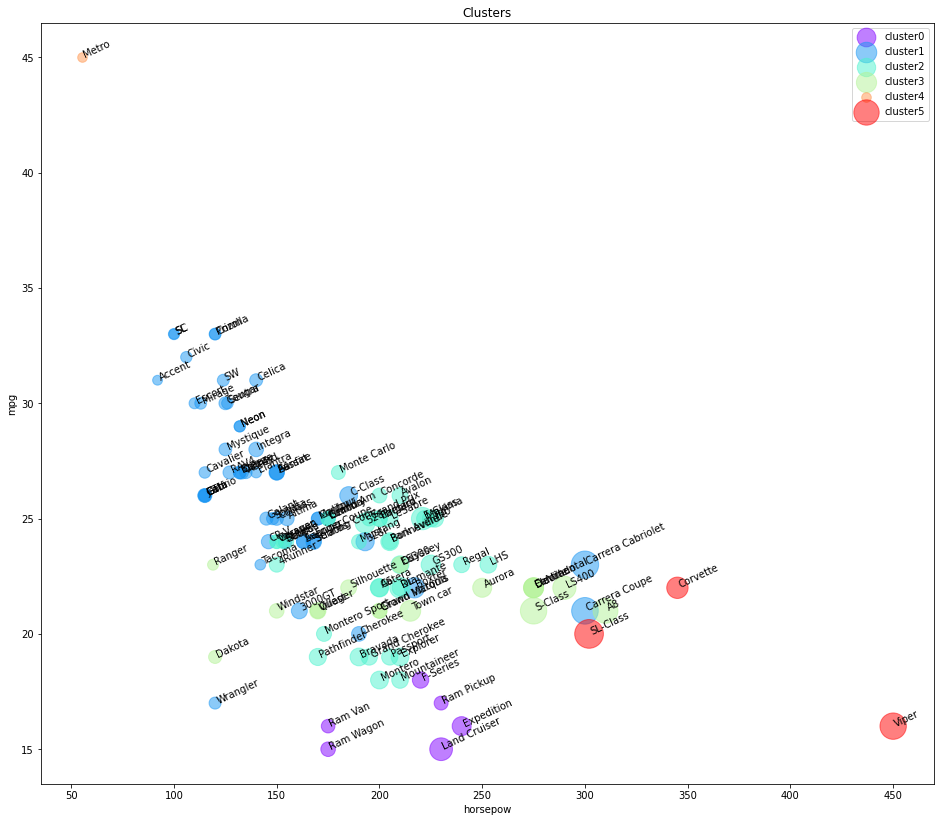

In [244]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df_hierarchical[df_hierarchical.cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25) 
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')
plt.show()

It is obvious that we have 3 main clusters with the majority of vehicles in those.

**Cars**:

-   Cluster 1: with almost high mpg, and low in horsepower.
-   Cluster 2: with good mpg and horsepower, but higher price than average.
-   Cluster 3: with low mpg, high horsepower, highest price.

**Trucks**:

-   Cluster 1: with almost highest mpg among trucks, and lowest in horsepower and price.
-   Cluster 2: with almost low mpg and medium horsepower, but higher price than average.
-   Cluster 3: with good mpg and horsepower, low price.

Please notice that we did not use **type** , and **price** of cars in the clustering process, but Hierarchical clustering could forge the clusters and discriminate them with quite high accuracy.


# **SYSTEM RECOMMENDATION**

#### `Content-based recommendation` 

Recommendation systems are a collection of algorithms used to recommend items to users based on information taken from the user. These systems have become ubiquitous, and can be commonly seen in online stores, movies databases and job finders. In this notebook, we will explore Content-based recommendation systems and implement a simple version of one using Python and the Pandas library.


In [17]:
import wget
from zipfile import ZipFile 

wget.download(r"https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module 5/data/moviedataset.zip","moviedataset.zip")

print("unziping....")

z = ZipFile("moviedataset.zip")
z.extractall()

unziping....


In [2]:
movies = pd.read_csv(".\ml-latest\movies.csv")

ratings = pd.read_csv(r".\ml-latest\ratings.csv")

movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
movies["year"] = movies.title.str.extract("(\(\d\d\d\d\))",expand=False)
movies["year"] = movies.year.str.extract("(\d\d\d\d)",expand=False)

movies.title = movies.title.str.replace("(\(\d\d\d\d\))","")
movies.title = movies.title.str.strip()

In [4]:
movies.genres = movies.genres.str.split("|")

In [5]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II,[Comedy],1995


In [6]:
movies_copy = movies.copy()

In [7]:
for index, row in movies_copy.iterrows():
    for genre in row["genres"]:
        movies_copy.at[index,genre] = 1

In [8]:
movies_copy = movies_copy.fillna(0)

In [9]:
movies_copy.head()

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men,"[Comedy, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II,[Comedy],1995,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,169,2.5,1204927694
1,1,2471,3.0,1204927438
2,1,48516,5.0,1204927435
3,2,2571,3.5,1436165433
4,2,109487,4.0,1436165496


In [11]:
ratings.drop("timestamp",axis = 1,inplace = True)
ratings.head()

,userId,movieId,rating
0,1,169,2.5
1,1,2471,3.0
2,1,48516,5.0
3,2,2571,3.5
4,2,109487,4.0


In [12]:
userInput = [
            {'title':'Breakfast Club, The', 'rating':5},
            {'title':'Toy Story', 'rating':3.5},
            {'title':'Jumanji', 'rating':2},
            {'title':"Pulp Fiction", 'rating':5},
            {'title':'Akira', 'rating':4.5}
         ] 
inputMovies = pd.DataFrame(userInput)
inputMovies

,title,rating
0,"Breakfast Club, The",5.0
1,Toy Story,3.5
2,Jumanji,2.0
3,Pulp Fiction,5.0
4,Akira,4.5


In [13]:
inputID = movies[movies.title.isin(inputMovies.title)]
inputMovies = pd.merge(inputMovies,inputID)

In [14]:
inputMovies = inputMovies[["title","movieId","rating"]]
inputMovies

,title,movieId,rating
0,"Breakfast Club, The",1968,5.0
1,Toy Story,1,3.5
2,Jumanji,2,2.0
3,Pulp Fiction,296,5.0
4,Akira,1274,4.5


In [15]:
userMovies = movies_copy[movies_copy.movieId.isin(inputMovies.movieId)]
userMovies

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
293,296,Pulp Fiction,"[Comedy, Crime, Drama, Thriller]",1994,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1246,1274,Akira,"[Action, Adventure, Animation, Sci-Fi]",1988,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1885,1968,"Breakfast Club, The","[Comedy, Drama]",1985,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
userMovies = userMovies.reset_index(drop=True)
userMovies = userMovies.drop("movieId",1).drop("title",1).drop("genres",1).drop("year",1)

In [17]:
inputMovies["rating"]

0    5.0
1    3.5
2    2.0
3    5.0
4    4.5
Name: rating, dtype: float64

In [18]:
userProfile = userMovies.T.dot(inputMovies["rating"])
userProfile

Adventure             13.5
Animation             10.0
Children               8.5
Comedy                11.5
Fantasy                8.5
Romance                0.0
Drama                  6.5
Action                 5.0
Crime                  2.0
Thriller               2.0
Horror                 0.0
Mystery                0.0
Sci-Fi                 5.0
IMAX                   0.0
Documentary            0.0
War                    0.0
Musical                0.0
Western                0.0
Film-Noir              0.0
(no genres listed)     0.0
dtype: float64

In [19]:
genreTable = movies_copy.set_index("movieId").drop("title",1).drop("genres",1).drop("year",1)
genreTable.head()

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
movieId,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
recomendTable = ((genreTable*userProfile).sum(axis=1)/userProfile.sum()).to_frame().reset_index()
recomendTable.columns = ["movieId","Prob"]
recomendTable.head()

,movieId,Prob
0,1,0.717241
1,2,0.420690
2,3,0.158621
3,4,0.248276
4,5,0.158621


In [21]:
moviesRecommend = movies.set_index("movieId").reset_index()
moviesRecommend = pd.merge(moviesRecommend,recomendTable)
moviesRecommend.sort_values(by = "Prob",inplace=True, ascending=False)
moviesRecommend.head(10)

,movieId,title,genres,year,Prob
8605,26093,"Wonderful World of the Brothers Grimm, The","[Adventure, Animation, Children, Comedy, Drama...",1962,0.806897
664,673,Space Jam,"[Adventure, Animation, Children, Comedy, Fanta...",1996,0.786207
28220,130520,Home,"[Adventure, Animation, Children, Comedy, Fanta...",2015,0.786207
22881,108932,The Lego Movie,"[Action, Adventure, Animation, Children, Comed...",2014,0.786207
9825,32031,Robots,"[Adventure, Animation, Children, Comedy, Fanta...",2005,0.786207
11716,51632,Atlantis: Milo's Return,"[Action, Adventure, Animation, Children, Comed...",2003,0.786207
11751,51939,TMNT (Teenage Mutant Ninja Turtles),"[Action, Adventure, Animation, Children, Comed...",2007,0.786207
8783,26340,"Twelve Tasks of Asterix, The (Les douze travau...","[Action, Adventure, Animation, Children, Comed...",1976,0.786207
9296,27344,Revolutionary Girl Utena: Adolescence of Utena...,"[Action, Adventure, Animation, Comedy, Drama, ...",1999,0.758621
2902,2987,Who Framed Roger Rabbit?,"[Adventure, Animation, Children, Comedy, Crime...",1988,0.744828


### Advantages and Disadvantages of Content-Based Filtering

##### Advantages

-   Learns user's preferences
-   Highly personalized for the user

##### Disadvantages

-   Doesn't take into account what others think of the item, so low quality item recommendations might happen
-   Extracting data is not always intuitive
-   Determining what characteristics of the item the user dislikes or likes is not always obvious


<hr>

<a id="ref3"></a>

# Collaborative Filtering


Now, time to start our work on recommendation systems. 

The first technique we're going to take a look at is called **Collaborative Filtering**, which is also known as **User-User Filtering**. As hinted by its alternate name, this technique uses other users to recommend items to the input user. It attempts to find users that have similar preferences and opinions as the input and then recommends items that they have liked to the input. There are several methods of finding similar users (Even some making use of Machine Learning), and the one we will be using here is going to be based on the **Pearson Correlation Function**.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%205/images/User_Item.png" width=800px>

The process for creating a User Based recommendation system is as follows:

-   Select a user with the movies the user has watched
-   Based on his rating to movies, find the top X neighbours 
-   Get the watched movie record of the user for each neighbour.
-   Calculate a similarity score using some formula
-   Recommend the items with the highest score

Let's begin by creating an input user to recommend movies to:

Notice: To add more movies, simply increase the amount of elements in the userInput. Feel free to add more in! Just be sure to write it in with capital letters and if a movie starts with a "The", like "The Matrix" then write it in like this: 'Matrix, The' .


In [22]:
movies_collaborative = movies.drop(columns = "genres")
movies_collaborative.head()

,movieId,title,year
0,1,Toy Story,1995
1,2,Jumanji,1995
2,3,Grumpier Old Men,1995
3,4,Waiting to Exhale,1995
4,5,Father of the Bride Part II,1995


In [23]:
rating_collaborative = ratings

In [24]:
userInput = [
            {'title':'Breakfast Club, The', 'rating':5},
            {'title':'Toy Story', 'rating':3.5},
            {'title':'Jumanji', 'rating':2},
            {'title':"Pulp Fiction", 'rating':5},
            {'title':'Akira', 'rating':4.5}
         ] 
inputMovies = pd.DataFrame(userInput)
inputMovies

,title,rating
0,"Breakfast Club, The",5.0
1,Toy Story,3.5
2,Jumanji,2.0
3,Pulp Fiction,5.0
4,Akira,4.5


In [25]:
inputID = movies_collaborative[movies_collaborative.title.isin(inputMovies.title.to_list())][["movieId","title"]]

inputMovies  = pd.merge(inputID,inputMovies)
inputMovies

,movieId,title,rating
0,1,Toy Story,3.5
1,2,Jumanji,2.0
2,296,Pulp Fiction,5.0
3,1274,Akira,4.5
4,1968,"Breakfast Club, The",5.0


In [26]:
# create list of users watched same films with input user
userSubset = rating_collaborative[rating_collaborative.movieId.isin(inputMovies.movieId.to_list())]
userSubset = userSubset.groupby("userId")
userSubset.get_group(1130)

,userId,movieId,rating
104167,1130,1,0.5
104168,1130,2,4.0
104214,1130,296,4.0
104363,1130,1274,4.5
104443,1130,1968,4.5


In [27]:
sorted_user_subset = sorted(userSubset, key = lambda x: len(x[1]), reverse=True)
sorted_user_subset[0:3]

[(75,
        userId  movieId  rating
  7507      75        1     5.0
  7508      75        2     3.5
  7540      75      296     5.0
  7633      75     1274     4.5
  7673      75     1968     5.0),
 (106,
        userId  movieId  rating
  9083     106        1     2.5
  9084     106        2     3.0
  9115     106      296     3.5
  9198     106     1274     3.0
  9238     106     1968     3.5),
 (686,
         userId  movieId  rating
  61336     686        1     4.0
  61337     686        2     3.0
  61377     686      296     4.0
  61478     686     1274     4.0
  61569     686     1968     5.0)]

#### Similarity of users to input user

Next, we are going to compare all users (not really all !!!) to our specified user and find the one that is most similar.  
we're going to find out how similar each user is to the input through the **Pearson Correlation Coefficient**. It is used to measure the strength of a linear association between two variables. The formula for finding this coefficient between sets X and Y with N values can be seen in the image below. 

Why Pearson Correlation?

Pearson correlation is invariant to scaling, i.e. multiplying all elements by a nonzero constant or adding any constant to all elements. For example, if you have two vectors X and Y,then, pearson(X, Y) == pearson(X, 2 * Y + 3). This is a pretty important property in recommendation systems because for example two users might rate two series of items totally different in terms of absolute rates, but they would be similar users (i.e. with similar ideas) with similar rates in various scales .

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/bd1ccc2979b0fd1c1aec96e386f686ae874f9ec0 "Pearson Correlation")

The values given by the formula vary from r = -1 to r = 1, where 1 forms a direct correlation between the two entities (it means a perfect positive correlation) and -1 forms a perfect negative correlation. 

In our case, a 1 means that the two users have similar tastes while a -1 means the opposite.


In [28]:
# 100 users are the most similar with input user

top100_users = sorted_user_subset[0:100]
top100_users[0:1]

[(75,
        userId  movieId  rating
  7507      75        1     5.0
  7508      75        2     3.5
  7540      75      296     5.0
  7633      75     1274     4.5
  7673      75     1968     5.0)]

In [29]:
pearson_correlation = {}

ratings_input = inputMovies.sort_values(by = "movieId").rating.to_list()
nRating_input = len(ratings_input)

for user, rating_group in top100_users:
    ratings_user = rating_group.sort_values(by = "movieId").rating.to_list()
    nRating_user = len(ratings_user)
    Sxx = sum([i**2 for i in ratings_input]) - pow(sum(ratings_input),2)/float(nRating_user)
    Syy = sum([i**2 for i in ratings_user]) - pow(sum(ratings_user),2)/float(nRating_user)
    Sxy = sum([i*j for i,j in zip(ratings_input,ratings_user)]) - sum(ratings_input)*sum(ratings_user)/float(nRating_user)
    if Sxx == 0 or Syy == 0:
        pearson = 0
    else:
        pearson = Sxy/np.sqrt(Sxx*Syy)
    
    pearson_correlation[user] = pearson
# pearson_correlation.items()

In [30]:
pearsonDF = pd.DataFrame.from_dict(pearson_correlation, orient = 'index')
pearsonDF.columns = ['similarityIndex']
pearsonDF["userId"] = pearsonDF.index
pearsonDF = pearsonDF.reset_index(drop=True)
pearsonDF.head()

,similarityIndex,userId
0,0.827278,75
1,0.586009,106
2,0.832050,686
3,0.576557,815
4,0.943456,1040


In [31]:
# get 50 similar users

topUsers = pearsonDF.sort_values("similarityIndex", ascending=False)[0:50]
topUsers.head()

,similarityIndex,userId
64,0.961678,12325
34,0.961538,6207
55,0.961538,10707
67,0.960769,13053
4,0.943456,1040


In [32]:
topUsersrating = pd.merge(rating_collaborative,topUsers, left_on="userId", right_on="userId", how = "inner")
topUsersrating.head()

,userId,movieId,rating,similarityIndex
0,75,1,5.0,0.827278
1,75,2,3.5,0.827278
2,75,16,3.0,0.827278
3,75,19,2.5,0.827278
4,75,21,4.5,0.827278


Now all we need to do is simply multiply the movie rating by its weight (The similarity index), then sum up the new ratings and divide it by the sum of the weights.

We can easily do this by simply multiplying two columns, then grouping up the dataframe by movieId and then dividing two columns:

It shows the idea of all similar users to candidate movies for the input user:


In [33]:
topUsersrating["Weight"] = topUsersrating["rating"] * topUsersrating["similarityIndex"]
topUsersrating.head()

,userId,movieId,rating,similarityIndex,Weight
0,75,1,5.0,0.827278,4.136391
1,75,2,3.5,0.827278,2.895474
2,75,16,3.0,0.827278,2.481834
3,75,19,2.5,0.827278,2.068195
4,75,21,4.5,0.827278,3.722752


In [37]:
topUsersrating = topUsersrating.groupby("movieId").sum()[["similarityIndex","Weight"]]
topUsersrating.head()

,similarityIndex,Weight
movieId,,
1,38.376281,140.800834
2,38.376281,96.656745
3,10.253981,27.254477
4,0.929294,2.787882
5,11.723262,27.151751


In [39]:
recommendation_DF = pd.DataFrame()
recommendation_DF["Avg Weight Score"] = topUsersrating["Weight"] / topUsersrating["similarityIndex"]
recommendation_DF["MovieId"] = topUsersrating.index
recommendation_DF.head()

,Avg Weight Score,MovieId
movieId,,
1,3.668955,1
2,2.518658,2
3,2.657941,3
4,3.000000,4
5,2.316058,5


In [40]:
recommendation_DF = recommendation_DF.sort_values("Avg Weight Score", ascending=False)
recommendation_DF.head()

,Avg Weight Score,MovieId
movieId,,
5073,5.0,5073
3329,5.0,3329
2284,5.0,2284
26801,5.0,26801
6776,5.0,6776


In [43]:
movies_collaborative[movies_collaborative.movieId.isin(recommendation_DF.MovieId.head(10).to_list())]

,movieId,title,year
2200,2284,Bandit Queen,1994
3243,3329,"Year My Voice Broke, The",1987
3669,3759,Fun and Fancy Free,1947
3679,3769,Thunderbolt and Lightfoot,1974
3685,3775,Make Mine Music,1946
4978,5073,"Son's Room, The (Stanza del figlio, La)",2001
6563,6672,War Photographer,2001
6667,6776,Lagaan: Once Upon a Time in India,2001
9064,26801,Dragon Inn (Sun lung moon hak chan),1992
18106,90531,Shame,2011


### Advantages and Disadvantages of Collaborative Filtering

##### Advantages

-   Takes other user's ratings into consideration
-   Doesn't need to study or extract information from the recommended item
-   Adapts to the user's interests which might change over time

##### Disadvantages

-   Approximation function can be slow
-   There might be a low of amount of users to approximate
-   Privacy issues when trying to learn the user's preferences
